# US companies and industry landscape with Crunchbase  Data 

**Overview**
In order to get a better understanding of companies and industry landscape in US,  we analyzed companies distributions, funding amounts, and aquisition trends in US using the Crunchbase data. 
This file consists of the following sections: 
<li> Enviroment Configuration 
<li> Data Preparation 
<li> Data Visualization    
       

# 1. Environment Configuration

#### Step 1. Set up Google Authorization for Google Drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpl6hsqb_s/pubring.gpg' created
gpg: /tmp/tmpl6hsqb_s/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


#### Step 2. Mount Google Drive  to drive folder

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

####  Step 3. Install libraries and dependencies   
Import the following modules in Python3.   

In [41]:
! pip install xlrd

In [42]:
! pip install wordcloud

In [0]:
import pandas as pd
import numpy as np
import io
import csv
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from IPython.display import Image
import matplotlib.image as mpimg

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
py.sign_in('yuexili', 'ksmqfbTtCQIGqTtQpJGf')


# 2. Data Preparation

### 1. Import Data   
This project used the following four datasets, which are available in  (**Datasource**: [Crunchbase data](https://data.crunchbase.com/docs) ) 
 

In [0]:
company= pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx',"Companies")
investment = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Investments")
acquisition = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Acquisitions")
rounds = pd.read_excel('drive/data_viz/company_investors_acquisition.xlsx', "Rounds")

### 2. Data Information

This project used the following four datasets, which are available in  (**Datasource**: [Crunchbase data](https://data.crunchbase.com/docs) ) 

|Table | Number of Entries |Contents |
|--|--|--|
| `company` |49,438  | <li>regional onformation <li>market/ industry information<li>funding status  |
|`investment` |114,506|<li>companies's information <li>investor's <li>funding information |
| `acquisition` |  55,240|<li>companies and its acquirer's  information <li>price_amount of money the acquirer paid|
|`rounds `|83,870|<li>companies' information <li>funding status <li>amount of money rasied| 

#### 1. `Company` dataset:
This dataset has 49,438 entires and has records regarding companies' regional information, market/ industry information and also their funding status. 

#### 2. `investment`  dataset :
The `investment` dataset has 114,506 entires and covers three main parts: companies's , investor's  and the funding information.

#### 3. `acquisition`: 
This dataset has 55,240 records which includes companies and its acquirer's basic information together with the price_amount of money the acquirer paid.  

#### 4. `rounds`: 
This dataset has 83,870 entries which contains the companies' basic information the funding status and also the amount of money rasied. 

### 3. Data cleaning

** Subset the data entries for companies only based in USA**:  
> <li> For the `Acquisition` data: 
The number of region information is not normally distributed, which skewed on USA side (97.97% is paid in USD, and nearly 77% of the acquisition company is based in USA). So we filtered those data entries by 
1. `company_country_code=='USA'`  
1. `price_currency_code=='USD'` 

In [0]:
# Focus only on USA startups.
USA = company[company.country_code == 'USA'] 
USA.dropna(subset = ['status','state_code'],inplace = True)

In [0]:
acquisition=acquisition[acquisition.company_country_code=='USA']
acquisition=acquisition[acquisition.price_currency_code=='USD']

#3.  Data Visualization

 ## Content Overview  
We deep dive into the Crunchbase data and do anlysis in regards to:
<li> Company's counts and distributions   
<li> Investments in industry  
<li> Funding amount and compositions  



## 1. The total count of companies in each state in US from 1960-2014:  
This graph was generated using Plotly, showing a basic regional distribution of the companies in US. 


*   California has the most counts of start-ups, the number of which is way greater than the second state, New York.


In [0]:
states = {
        'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida',
        'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois',
        'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts',
        'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri',
        'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
        'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
        'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia',
        'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [0]:
acquisition["company_states"] = acquisition["company_state_code"].map(states)

In [0]:
overview_df = acquisition.groupby(["company_state_code","company_states"]).agg({"price_amount" : "sum", "company_name" : "count", "company_market" : "nunique", "company_city" : "nunique"}).reset_index()

In [166]:
for col in overview_df.columns:
    overview_df[col] = overview_df[col].astype(str)
    
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

scl = [[0.0, 'rgb(242,240,247)'],[0.5, 'rgb(158,154,200)'],[1.0, 'rgb(84,39,143)']]

overview_df["text"] = overview_df["company_state_code"] + '<br>' + \
             overview_df["company_states"] + '<br>' + \
             overview_df["company_name"] + " Companies" + '<br>' + \
             overview_df["company_market"] + " Markets" + '<br>' + overview_df["company_city"] + " Cities"

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = overview_df['company_state_code'],
        z = overview_df['price_amount'],
        locationmode = 'USA-states',
        text = overview_df["text"],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Total Acquisition Amount USD")
        ) ]

layout = dict(
        title = 'US Company Acquisition Overview',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map')

##2. Counts of companies founded and got acquired from year 2000 to 2013

The trend of total companies founded and acquired over years.
 
*   Entrepreneurship is on an upward trend.
*   Whether the crises have impacts on Entrepreneurship trend: 1) we can see that from 2007 to 2008 total companies founded remain constant, but no expected sharp decrease. And after financial crisis in 2008, there was a spike of total companies founded, kind of an economic revival, but the acquisition activities kept constant after financial crisis. 2) However, after crisis of 2012, the Containing Crisis, the total companies founded had a sharp decrease. We can tell the Containing Crisis that countries and banks struggle to get balances sheets has much negative impact on starting a company. In the contrast, acquisition activities increased slightly.
 
So, we can tell from this plot, that crisis do have some impacts on total companies founded and acquired each year, but the most famous 2008 financial crisis actually didn’t affect much on total companies founded and acquired.



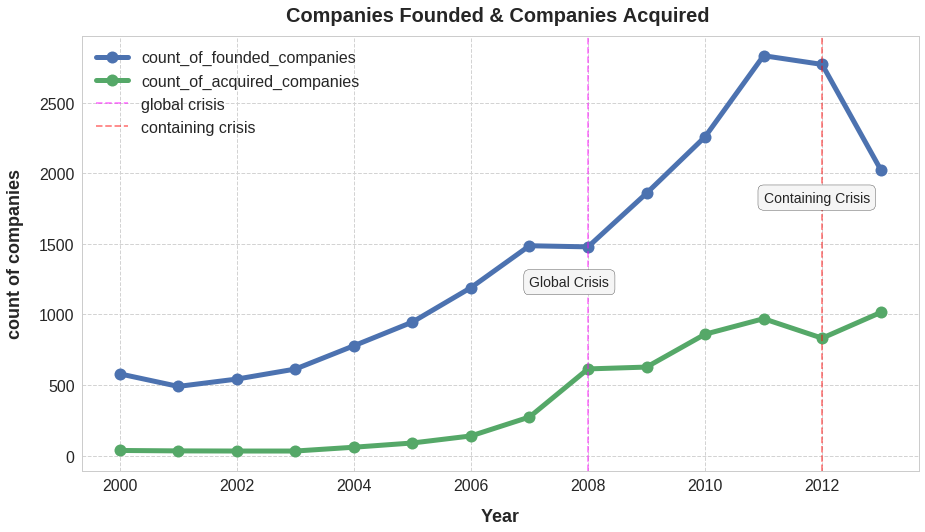

In [167]:
sns.set(style="whitegrid")
USA[(USA.founded_year >= 2000) & (USA.founded_year <= 2013)].groupby('founded_year').size().to_frame().reset_index().\
rename(columns={'founded_year':'year', 0:'count_of_founded_companies'}).set_index('year')['count_of_founded_companies'].\
plot(grid = True, legend = True,linewidth=5.0, marker='o', markersize = 12)
acquisition[(acquisition.company_country_code == 'USA') & (acquisition.acquired_year >= 2000) & (acquisition.acquired_year <= 2013)].\
groupby('acquired_year').size().to_frame().reset_index().rename(columns={'acquired_year':'year', 0:'count_of_acquired_companies'}).\
set_index('year')['count_of_acquired_companies'].plot(grid = True, figsize = (15,8), legend = True,linewidth=5.0,marker='o', markersize = 12)
plt.xlabel('Year', fontsize = 18, weight='bold', labelpad = 15)
plt.ylabel('count of companies', fontsize = 18, weight='bold', labelpad = 15)
plt.title('Companies Founded & Companies Acquired ', weight='bold', fontsize = 20, y = 1.03)
plt.grid(linestyle="dashed", color="lightgrey")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, loc="upper left", markerscale=1.5, frameon=False)
plt.axvline(x=2008, color='fuchsia',linestyle='--', label = 'global crisis',alpha=0.5)
plt.axvline(x=2012, color='red',linestyle='--', label = 'containing crisis',alpha=0.5)
plt.legend(fontsize=16)
plt.text(x=2007, y=1200, s="Global Crisis", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))
plt.text(x=2011, y=1800, s="Containing Crisis", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"));

![FinancialCrisis](https://media.brstatic.com/2017/03/20162408/economics_euro-crisis-timeline-1999.jpg)

## 3. What are the hot markets among the founded companies.

The wordcloud below shows the hot topics in the market. 


*   From the worldcloud picture, we can see that the hottest industries that attract the investor are software and Internet related. 



In [0]:
acquisition_data=acquisition.copy()
text='start '
for ele in acquisition_data.company_market.dropna():
    text=text +' '+ ele

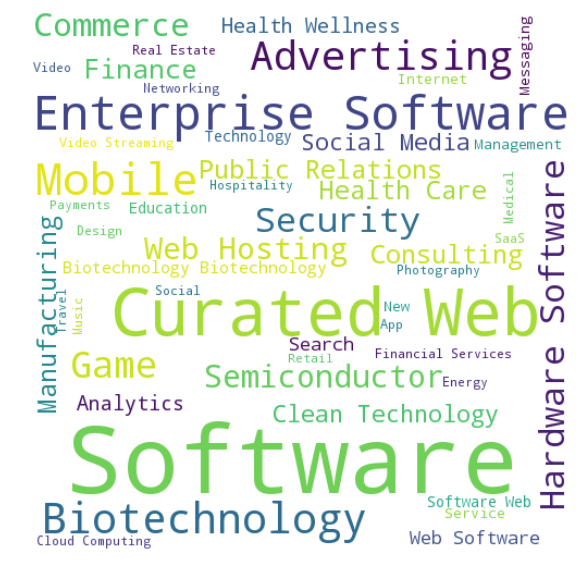

In [169]:
wordcloud = WordCloud(width=500, height=500,background_color='white', max_words=50).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(18,10) 

## 4. How long it takes for a startup in the top 15 markets to be acquired

Exit time for companies in the top 15 markets.

*   Among the top 15 markets, majority of the companies got acquried within 5-10 years.
*   Consulting companies took much longer time to be acquired.



In [0]:
# Get the most popular 15 markets that got acquired from the acquisition table. 
acquired_company_market = acquisition[['company_market']].dropna()
acquired_number_per_market = acquired_company_market.groupby('company_market').size().sort_values(ascending = False).\
to_frame().reset_index().rename(columns={0:'number_of_companies'})
top15_acquired_markets = acquired_number_per_market.head(15)

In [0]:
founded = company[['name','founded_year']].dropna()
acquired = acquisition[['company_name','company_market','acquired_year']].dropna()
founded_acquired = acquired.merge(founded, left_on = 'company_name', right_on = 'name', how = 'inner')
top15_markets_founded_acquired = founded_acquired[founded_acquired.company_market.isin(top15_acquired_markets.company_market)]
top15_markets_founded_acquired['years_to_acq'] = top15_markets_founded_acquired['acquired_year'] - top15_markets_founded_acquired['founded_year']
top15_markets_founded_acquired = top15_markets_founded_acquired[(top15_markets_founded_acquired['years_to_acq'] > 0)
                                          & (top15_markets_founded_acquired['years_to_acq'] <= 100)]
order_markets_by_median_years_acq = top15_markets_founded_acquired.groupby('company_market', as_index = False)[['years_to_acq']].median().sort_values(
    by='years_to_acq').company_market

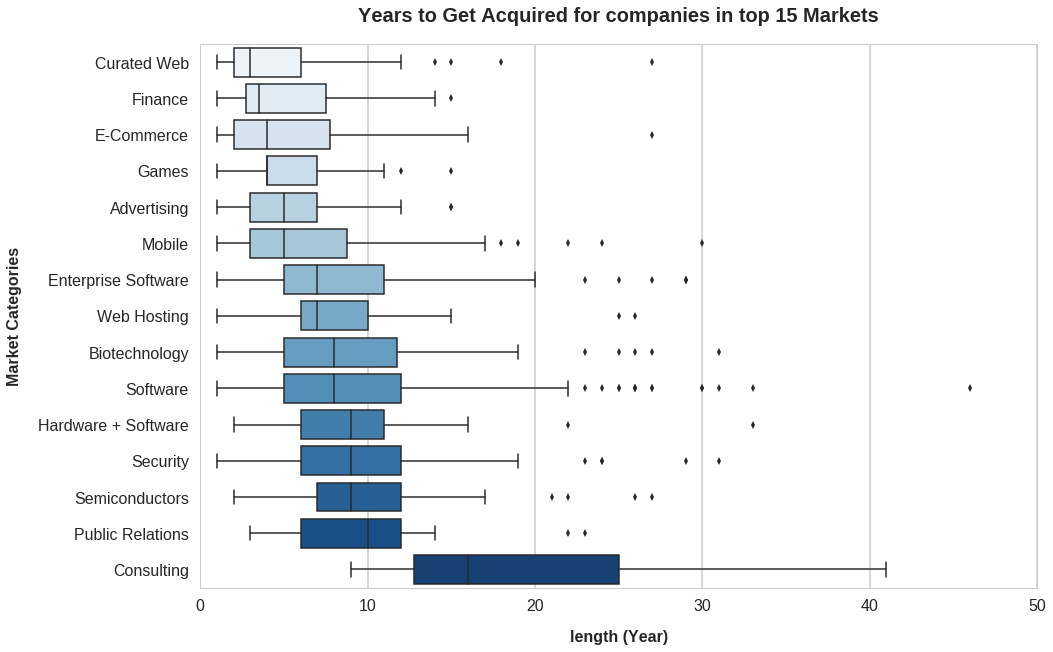

In [198]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'years_to_acq',y = 'company_market', ax=ax, linewidth = 1.5, data = top15_markets_founded_acquired,
               order = order_markets_by_median_years_acq, palette="Blues")
plt.xlim([0, 50])
plt.title('Years to Get Acquired for companies in top 15 Markets', fontsize = 20, weight='bold', y=1.03)
plt.xlabel('length (Year)', fontsize = 16, weight='bold', labelpad = 16)
plt.ylabel('Market Categories', fontsize = 16, weight='bold', labelpad = 16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

## 5. How the count of acquired companies in Top 5 market changes over time? 

The trend of money goes into each market from 2007 to 2014 



*  Biotechnology is large part of money going to acquisition
*  Pure software in terms of acquistion is shrinking compared to whole software market
*  Curated web is basically gone Enterprise software seems constant
*  Number of acquisition on mobile is steadly growing
*  There are cheap acquisitions for curated web companies and pure software companies









In [0]:
df = acquisition.copy()
# Limiting to US market, over 2007, price_amount>$100,000
df = df[(df.company_country_code=="USA") & (df.price_currency_code=="USD") & (df.acquired_year > 2006) & (df.price_amount > 100000)]
df["acquired_year"] = df["acquired_year"].astype(int)
top5_market = df.groupby("company_market").size().sort_values(ascending = False\
                                                                       ).head(5).reset_index().company_market
df_in_top5_market = df[df.company_market.isin(top5_market)]

In [0]:
acquired_amount_in_top5_market = df_in_top5_market.groupby(["acquired_year", "company_market"]).agg({"price_amount" : "sum"}).reset_index()
acquired_amount_in_top5_market.price_amount = acquired_amount_in_top5_market.price_amount.apply(lambda x: x/1000000000)
acquired_amount_in_top5_market_pivot = pd.pivot_table(acquired_amount_in_top5_market, values = "price_amount", index = "acquired_year", columns = "company_market")

In [0]:
acquired_companies_in_top5_market = df_in_top5_market.groupby(["acquired_year", "company_market"]).size().reset_index()
acquired_companies_in_top5_market_pivot = pd.pivot_table(acquired_companies_in_top5_market, index = "acquired_year", values = 0, columns = "company_market")

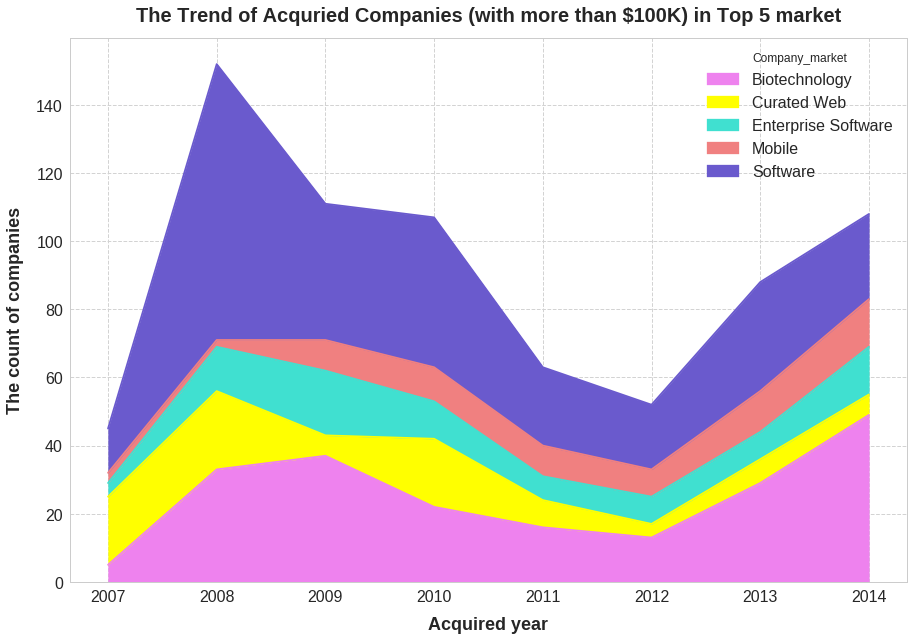

In [176]:
#color platte
new_colors = ["violet", "yellow", "turquoise", "lightcoral", "slateblue"]
acquired_companies_in_top5_market_pivot.plot(kind = "area", figsize = (15,10), color=new_colors, stacked = True)
plt.ylabel("The count of companies", fontsize=18, weight='bold', labelpad=12)
plt.xlabel("Acquired year", fontsize=18, weight='bold', labelpad=12)
plt.xticks(rotation = 360, fontsize=16)
plt.yticks(rotation = 360, fontsize=16)
plt.title("The Trend of Acquried Companies (with more than $100K) in Top 5 market", weight='bold', fontsize=20, y=1.03)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=16, title="Company_market", loc=0, markerscale=1.5, frameon=False);

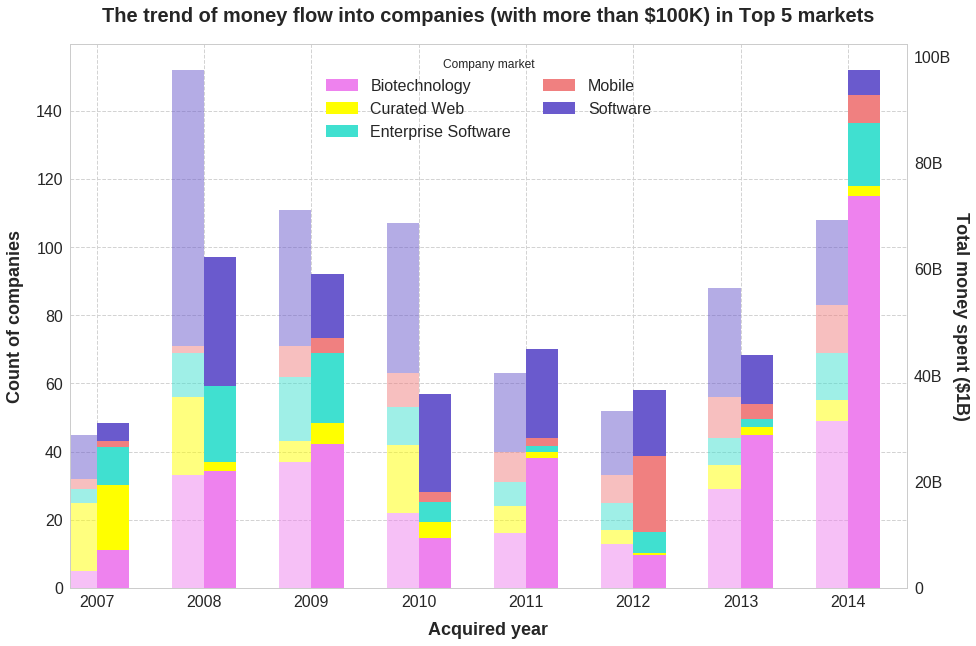

In [177]:
#plot code
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

acquired_companies_in_top5_market_pivot.plot(kind='bar', figsize = (15,10), color=new_colors, ax=ax, width=width, alpha=0.5, position=1, stacked = True, legend=False)
acquired_amount_in_top5_market_pivot.plot(kind='bar', figsize = (15,10), color=new_colors, ax=ax2, width=width, position=0, stacked = True, grid = False, legend=True)
ax.set_title("The trend of money flow into companies (with more than $100K) in Top 5 markets", weight='bold', fontsize=20, y=1.03)

ax.set_ylabel('Count of companies', fontsize=18, weight='bold', labelpad=12)
ax2.set_ylabel("Total money spent ($1B)", fontsize=18, weight='bold', labelpad=18, rotation=270)
xlabels = [i for i in range(2007,2015)]
ticks_bc=['0','20B','40B','60B','80B','100B',]
ax.set_yticklabels(np.arange(0,160,20),fontsize=16)
ax2.set_yticklabels(ticks_bc,fontsize=16)

ax.set_xlabel("Acquired year", fontsize=18, weight='bold', labelpad=12)
xlabels = [i for i in range(2007,2015)]
ax.set_xticklabels(xlabels, rotation=360, fontsize=16)

ax.grid(linestyle="dashed", color="lightgrey")
ax2.legend(fontsize=16, title="Company market", loc="upper center", ncol=2, markerscale=1.5, frameon=False)
plt.show()


Exit time for companies in the top 15 markets. 
*   Among the top 15 markets, majority of the companies got acquried within 5-10 years. 
*   Consulting companies took much longer time to be acquired. 





In [0]:
acquired_company_market = acquisition[['company_market']].dropna()
acquired_number_per_market = acquired_company_market.groupby('company_market').size().sort_values(ascending = False).\
to_frame().reset_index().rename(columns={0:'number_of_companies'})
top15_acquired_markets = acquired_number_per_market.head(15)

In [0]:
founded = company[['name','founded_year']].dropna()
acquired = acquisition[['company_name','company_market','acquired_year']].dropna()
founded_acquired = acquired.merge(founded, left_on = 'company_name', right_on = 'name', how = 'inner')
top15_markets_founded_acquired = founded_acquired[founded_acquired.company_market.isin(top15_acquired_markets.company_market)]
top15_markets_founded_acquired['years_to_acq'] = top15_markets_founded_acquired['acquired_year'] - top15_markets_founded_acquired['founded_year']
top15_markets_founded_acquired = top15_markets_founded_acquired[(top15_markets_founded_acquired['years_to_acq'] > 0)
                                          & (top15_markets_founded_acquired['years_to_acq'] <= 100)]
order_markets_by_median_years_acq = top15_markets_founded_acquired.groupby('company_market', as_index = False)[['years_to_acq']].median().sort_values(
    by='years_to_acq').company_market

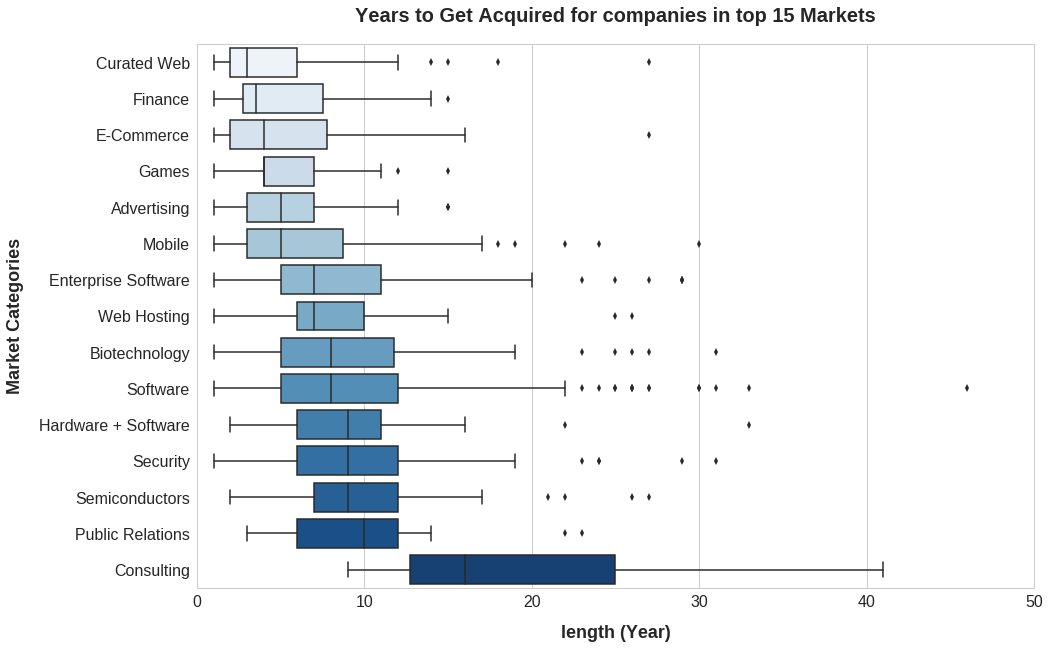

In [199]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'years_to_acq',y = 'company_market', ax = ax, linewidth = 1.5, data = top15_markets_founded_acquired,
               order = order_markets_by_median_years_acq, palette="Blues" )
plt.xlim([0, 50])
plt.title('Years to Get Acquired for companies in top 15 Markets', fontsize = 20, weight='bold', y=1.03)
plt.xlabel('length (Year)', fontsize = 18, weight='bold', labelpad = 15)
plt.ylabel('Market Categories', fontsize = 18, weight='bold', labelpad = 15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

## 6. How the count of acquired companies in Top 5 state changes over time?

Money going into acquisition per state from 2007 to 2014


*   There was a huge spike of acqusition around 2014 across USA 
*   California took more than 65% of acqusition in USA, continuously
*  There was relatively expensive acquisition in Illinois compared to other states, since 2012



In [0]:
top5_state = df.groupby("company_state_code")["company_name"].count().sort_values(ascending = False)[:5].reset_index().company_state_code
df_in_top5_state = df[df.company_state_code.isin(top5_state)]
acquired_companies_in_top5_state = df_in_top5_state.groupby(["acquired_year", 'company_state_code']).agg({"company_name" : "count"}).reset_index()
acquired_companies_in_top5_state_pivot = pd.pivot_table(acquired_companies_in_top5_state, index = "acquired_year", values = "company_name", columns = "company_state_code")

In [0]:
acquired_amount_in_top5_state = df_in_top5_state.groupby(["acquired_year", 'company_state_code']).agg({"price_amount" : "sum"}).reset_index()
acquired_amount_in_top5_state.price_amount = acquired_amount_in_top5_state.price_amount.apply(lambda x: x/1000000000)
acquired_amount_in_top5_state_pivot = pd.pivot_table(acquired_amount_in_top5_state, index = "acquired_year", values = "price_amount", columns = "company_state_code")

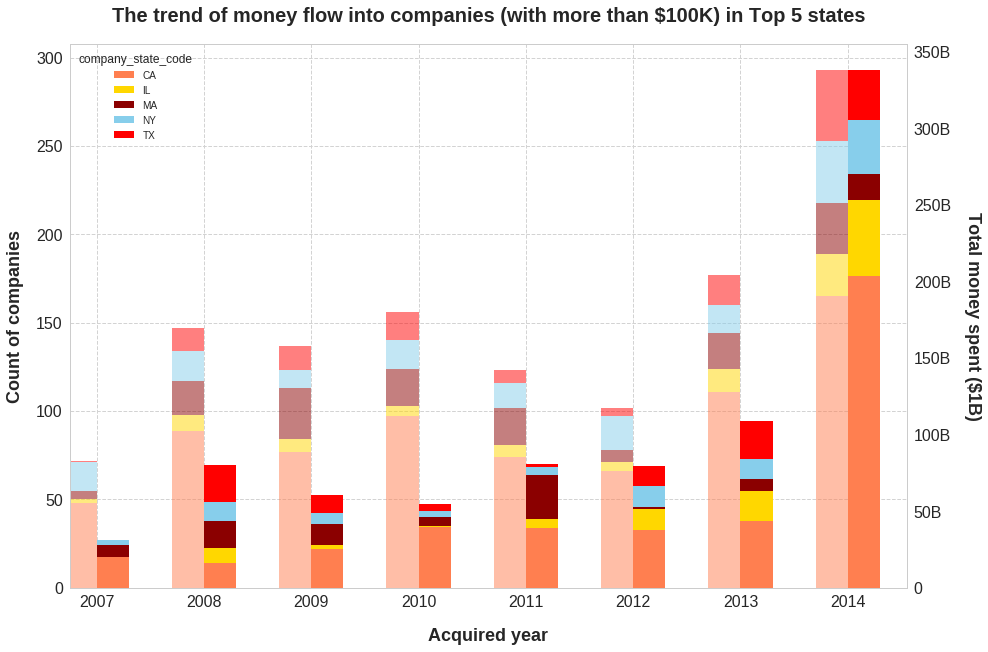

In [204]:
#color platte
color_set = ["coral", "gold", "darkred", "skyblue", "red"]
#plot code
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

acquired_companies_in_top5_state_pivot.plot(kind='bar', figsize = (15,10), color=color_set, ax=ax, width=width, position=1, alpha = 0.5, stacked = True, legend=False)
acquired_amount_in_top5_state_pivot.plot(kind='bar', figsize = (15,10), color=color_set, ax=ax2, width=width, position=0, stacked = True, grid = False, legend=True)
ax.set_title("The trend of money flow into companies (with more than $100K) in Top 5 states", weight='bold', fontsize=20, y=1.03)

ax.set_ylabel('Count of companies', fontsize=18, weight='bold', labelpad=12)
ax2.set_ylabel("Total money spent ($1B)", fontsize=18, weight='bold', labelpad=30, rotation=270)

ticks_b=['0','50B','100B','150B','200B','250B','300B','350B']
ax.set_yticklabels(np.arange(0,310,50),fontsize=16)
ax2.set_yticklabels(ticks_b,fontsize=16)

ax.set_xlabel("Acquired year", fontsize=18, weight='bold', labelpad=18)
xlabels = [i for i in range(2007,2015)]
ax.set_xticklabels(xlabels, rotation=360, fontsize=16)

ax.grid(linestyle="dashed", color="lightgrey")
# ax.legend(fontsize=16, title="Company State", loc=0, ncol=3, markerscale=1.5, frameon=False)

plt.show()

#plt.xticks(range(len(ticks_b)),ticks_b)


##7. How does total money spent for acquisition varies in top 5 market and top 5 state? 

Money going into acquisition by state and industry 


*   There is a huge skew to the biotechnology and software market in California
*   Compared to other states, software market took huge part of acquisition 





In [0]:
acquired_company_market = acquisition[['company_market']].dropna()
acquired_number_per_market = acquired_company_market.groupby('company_market').size().sort_values(ascending = False).\
to_frame().reset_index().rename(columns={0:'number_of_companies'})
top15_acquired_markets = acquired_number_per_market.head(15)

In [0]:
acquired_companies_in_top5_state_and_market = df[(df.company_state_code.isin(top5_state)) & (df.company_market.isin(top5_market))]
acquired_companies_in_top5_state_and_market_pivot = acquired_companies_in_top5_state_and_market.groupby(["company_state_code", "company_market"]\
                            ).agg({"price_amount":"sum"}).reset_index().pivot(index="company_market",\
                                                       columns="company_state_code", values="price_amount")
acquired_companies_in_top5_state_and_market_pivot = (acquired_companies_in_top5_state_and_market_pivot/100000000).round(2)

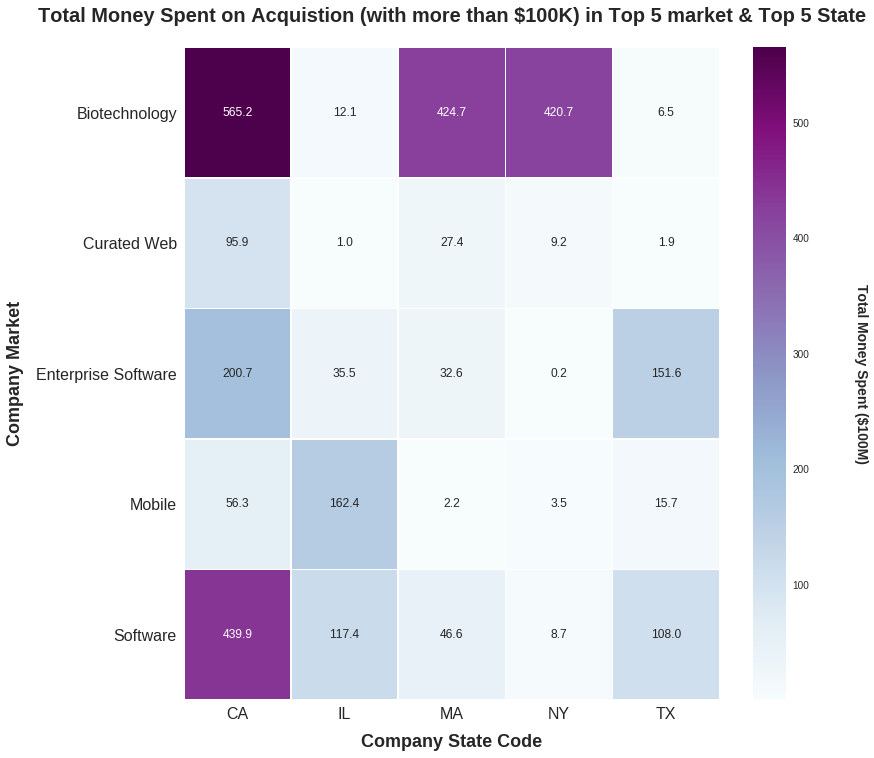

In [207]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(acquired_companies_in_top5_state_and_market_pivot, annot=True, linewidths=0.5, annot_kws={"size": 12}, fmt=".1f", ax=ax, cmap="BuPu")
ax.set_label("Total Money Spent ($100M)")
ax.text(1.25, 0.5, "Total Money Spent ($100M)", weight='bold', 
        rotation=270, size=14, ha='left', va='center', transform=ax.transAxes)
plt.ylabel("Company Market", fontsize=18, labelpad=12, weight='bold')
plt.xlabel("Company State Code", fontsize=18, labelpad=12, weight='bold')
plt.xticks(rotation = 360, fontsize=16)
plt.yticks(rotation = 360, fontsize=16)
plt.title("Total Money Spent on Acquistion (with more than $100K) in Top 5 market & Top 5 State", fontsize = 20, weight='bold', y =1.03);

## 8. Among all of those founded companies that got investments, what are the top 20 companies that have raised the most money? 


*   The top 20 most-funded companies are mainly inovative companies.





In [0]:
invest_amount = investment[['company_name','raised_amount_usd']].dropna()
invest_amount['raised_amount_usd_Billion'] = invest_amount['raised_amount_usd']/10000000000 # change the dollar amount unit to Billion
top20_companies_raised_most_money = invest_amount.groupby('company_name',as_index = False)['raised_amount_usd_Billion'].sum().sort_values(
    by = 'raised_amount_usd_Billion', ascending = False).head(20) # get the top 20 companies that have raised the most money

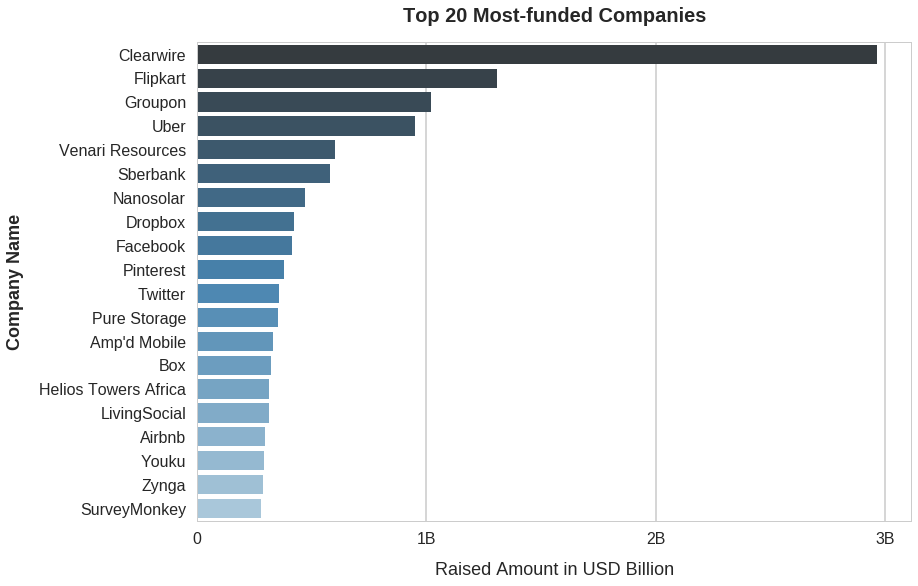

In [209]:
ticks_b=['0','1B','2B','3B']
sns.set_context('poster')
sns.barplot(x='raised_amount_usd_Billion',y='company_name',data=top20_companies_raised_most_money, orient = 'h', palette="Blues_d")
plt.title('Top 20 Most-funded Companies', fontsize = 20, weight = "bold", y =1.03)
plt.ylabel('Company Name', fontsize = 18, weight = "bold", labelpad = 15)
plt.xticks(range(len(ticks_b)),ticks_b, fontsize = 16)
plt.xlabel('Raised Amount in USD Billion', fontsize = 18, weight = "bold", labelpad = 15);

## 9. Funding amount distribution in each quarter from 2007 to 2014 for main funding type

Funding activitity by captical sources and distribution over year.

*   Companies have raised much money from venture and private_equity than seed and angel. 

*   Total captital goes the most in the first quarter of the year.  



In [0]:
rounds = rounds[rounds.funded_year>=2007]
funding_type = rounds[['funding_round_type','funded_quarter','raised_amount_usd']].dropna()
# funding_type = funding_type[~funding_type.raised_amount_usd.str.contains('-')]
# funding_type['raised_amount_usd'] = pd.to_numeric(funding_type.raised_amount_usd.str.replace(',',''))
funding_by_type_and_year = funding_type.groupby(['funding_round_type','funded_quarter'], as_index = False)[['raised_amount_usd']].sum()
mian_funding_type = ['angel','seed','venture','private_equity']
funding_by_miantype_and_year = funding_by_type_and_year[funding_by_type_and_year.funding_round_type.isin(mian_funding_type)]
funding_by_miantype_and_year_pivot = pd.pivot_table(funding_by_miantype_and_year, values = 'raised_amount_usd', 
                                                    index = 'funded_quarter', columns = 'funding_round_type')
funding_by_miantype_and_year_pivot = (funding_by_miantype_and_year_pivot/1000000000).round(0)

In [0]:
quarter_index=funding_by_miantype_and_year_pivot.index

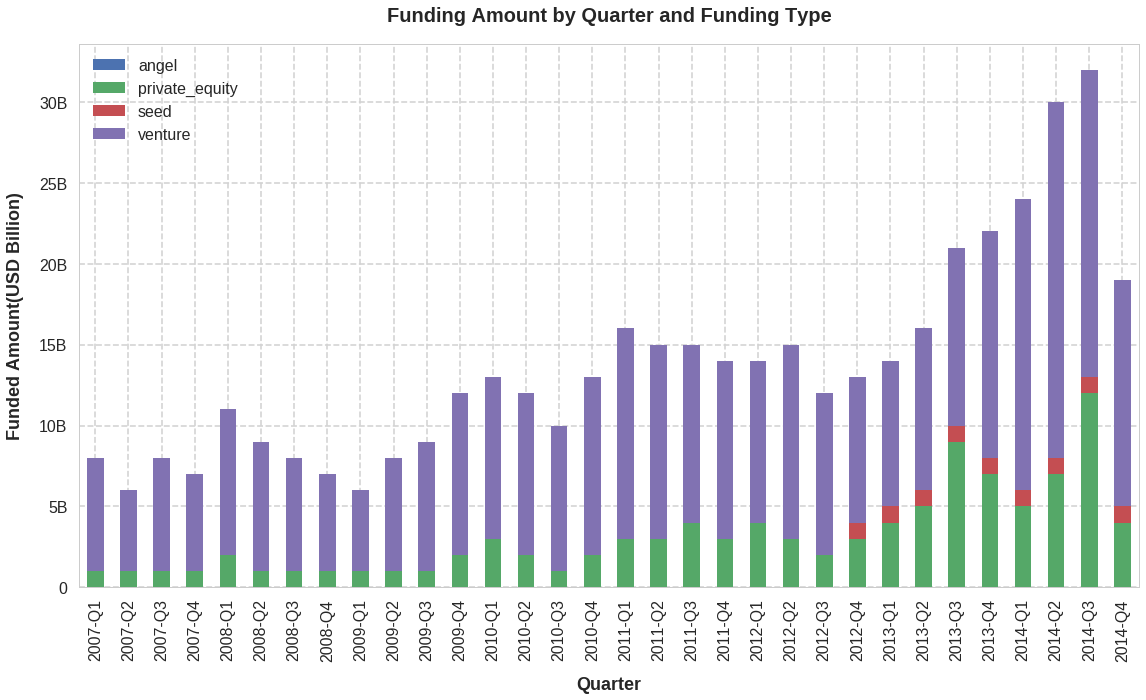

In [217]:
yticks = ['0','5B','10B','15B','20B','25B','30B']
funding_by_miantype_and_year_pivot.plot(kind = 'bar', figsize = (19,10), stacked = True)
plt.xticks(range(len(quarter_index)), quarter_index,fontsize = 16)
plt.yticks(np.arange(0, 35, step=5), yticks,fontsize = 16)
plt.xlabel('Quarter', fontsize = 18, weight='bold', labelpad = 15)
plt.ylabel('Funded Amount(USD Billion)', fontsize = 18, weight='bold', labelpad = 15)
plt.title('Funding Amount by Quarter and Funding Type', weight='bold', fontsize = 20, y=1.03)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize = 16);

## 10. Count of companies that got funding for each stage from 2007 to 2014

 If you wanna work for startup, what kind of companies you need to join?
*   Mobile, E-Commerce, and Curated Web are hard to go to ventureB and there is not much chance for higher level of investment, which also implies companies needs less funding to exit and less survival rate than other companies. 
*   Biotech, Health Care, Enterprise Software have higher barrior to entry, harder for landing to even first stage of funding. So, once you get round A, there is higher chance for getting round B 
*   If you want to work for startup, you'd better choose companies based on these insights. For example, if you pursue stability, you'd better look for Biotech, Enterprise Software startup. 





In [0]:
df_rounds = rounds.copy()
df_rounds["funding_round"] = df_rounds["funding_round_type"] + df_rounds["funding_round_code"]

In [0]:
df_funding_rounds = df_rounds[(df_rounds["funding_round"].isin(["seedA", "seedB", "ventureA", "ventureB", "ventureC", "ventureD", "ventureE"])) & \
                                    (df_rounds["raised_amount_usd"]>0) & 
                                    (df_rounds["funded_year"]>2006) & \
                                    (df_rounds["company_country_code"]=="USA")
                                   ] 

In [0]:
top10_Funding_Market = df_funding_rounds.groupby("company_market").agg({"company_name":"count"}).sort_values(by = "company_name", ascending = False)[:10].reset_index().company_market.tolist()

In [0]:
df_funding_top10_Market = df_funding_rounds[df_funding_rounds["company_market"].isin(top10_Funding_Market)]                                

In [0]:
df_funding_count_top10_market_pivot = df_funding_top10_Market.groupby(["company_market","funding_round"]).\
agg({"company_name":"count"}).pivot_table(index= "company_market", columns = "funding_round", values = "company_name")

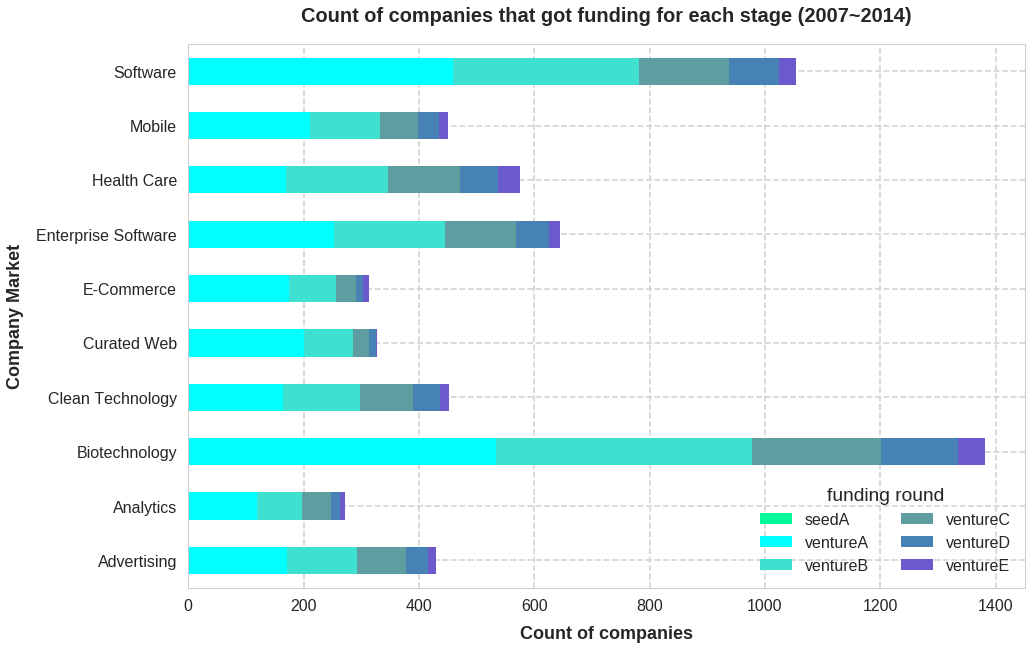

In [197]:
color1 = ["mediumspringgreen", "cyan", "turquoise", "cadetblue", "steelblue", "slateblue","navy"]
df_funding_count_top10_market_pivot.plot(kind = "barh", figsize = (15,10), color=color1, stacked = True)
plt.ylabel("Company Market", fontsize=18, weight = "bold", labelpad=12)
plt.xlabel("Count of companies", fontsize=18, weight = "bold", labelpad=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Count of companies that got funding for each stage (2007~2014)", fontsize = 20, weight = "bold", y =1.03)
plt.grid(linestyle="dashed", color="lightgrey")
plt.legend(fontsize=16, title = "funding round", loc=0, ncol=2, markerscale=1.5, frameon=False); 